# Project : Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [6]:
#import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Load the data set
df = pd.read_csv('C:/Users/User/Desktop/Data Science/Data_Trained_Evaluation_Projects/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
#Shape of the dataset
df.shape

(614, 13)

In [9]:
#Column Name 
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Data Type of the dataset
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
#Check for Missing Values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#Percentage of missing values w.r.t target variable i.e Loan_Status

#Only Numerical variables

In [14]:
df.groupby(['Loan_Status'])['Credit_History'].mean()

Loan_Status
N    0.541899
Y    0.981818
Name: Credit_History, dtype: float64

In [15]:
df.groupby(['Loan_Status'])['Loan_Amount_Term'].mean()

Loan_Status
N    344.064516
Y    341.072464
Name: Loan_Amount_Term, dtype: float64

In [16]:
df.groupby(['Loan_Status'])['LoanAmount'].mean()

Loan_Status
N    151.220994
Y    144.294404
Name: LoanAmount, dtype: float64

In [17]:
#Missing Values are present
#Using fillna method I will be eliminating the NaN values 

In [18]:
df.isnull().sum().sum()

149

In [19]:
#Treating Missing Values

In [20]:
#Gender
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [21]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [22]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [23]:
#Married
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [24]:
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [25]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [26]:
#Dependents
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [27]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [28]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [29]:
#Self_Employed
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [30]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [31]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [32]:
#LoanAmount
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [33]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [34]:
#Loan_Amount_Term
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [35]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [36]:
#Credit History
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [37]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [38]:
df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [39]:
#Structural Format
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot: >

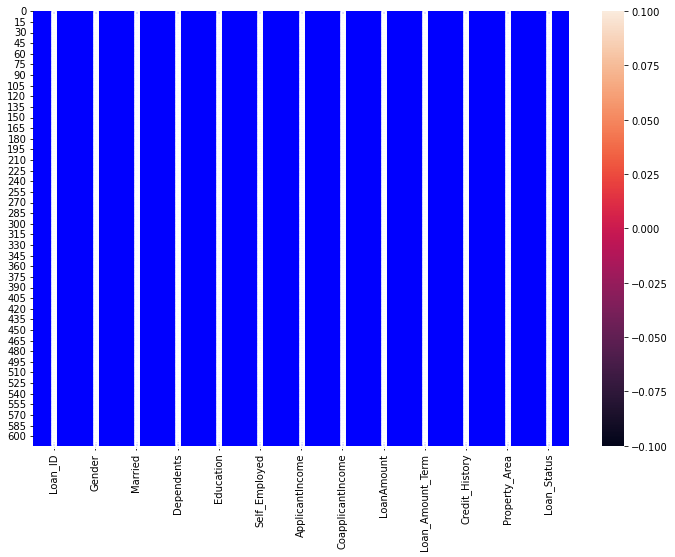

In [40]:
#Graphical Format
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),annot=True,linecolor='blue',linewidths=2)

I have replaced the missing values from the dataset.

Statistical Information

In [41]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [42]:
df.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


<AxesSubplot: >

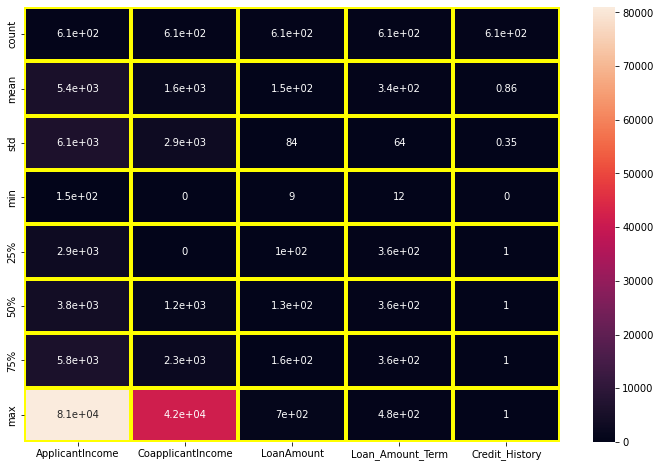

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(df.describe(),annot=True,linecolor='yellow',linewidths=4)

# Univariate Analysis 

In [44]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


Exploring the Categorical Variables

In [45]:
#Loan_ID
plt.figure(figsize=(20,20))
sns.countplot(df['Loan_ID'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'LP001002'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
#Gender
plt.figure(figsize=(10,6))
sns.countplot(df['Gender'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Male'

<Figure size 720x432 with 0 Axes>

In [ ]:
#Married
plt.figure(figsize=(10,6))
sns.countplot(df['Married'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'No'

<Figure size 720x432 with 0 Axes>

In [ ]:
#Dependents
plt.figure(figsize=(10,6))
sns.countplot(df['Dependents'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: '3+'

<Figure size 720x432 with 0 Axes>

In [ ]:
#Education
plt.figure(figsize=(10,6))
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Graduate'

<Figure size 720x432 with 0 Axes>

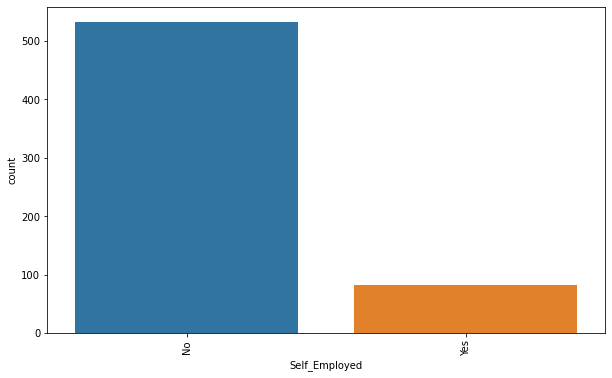

In [ ]:
#Self_Employed
plt.figure(figsize=(10,6))
sns.countplot(df['Self_Employed'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Property_Area
plt.figure(figsize=(10,6))
sns.countplot(df['Property_Area'])
plt.xticks(rotation=90)
plt.show()

ValueError: could not convert string to float: 'Urban'

<Figure size 720x432 with 0 Axes>

# Exploring Numerical Variables

# 1]Density plot

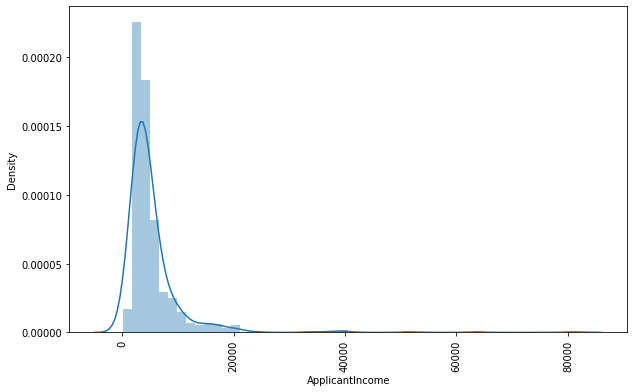

In [ ]:
#ApplicantIncome
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'])
plt.xticks(rotation=90)
plt.show()

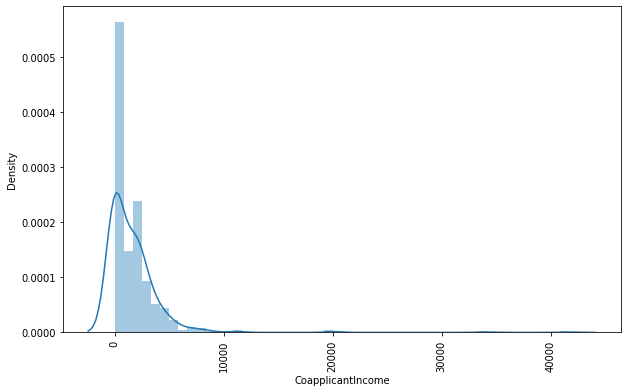

In [ ]:
#CoapplicantIncome
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome'])
plt.xticks(rotation=90)
plt.show()

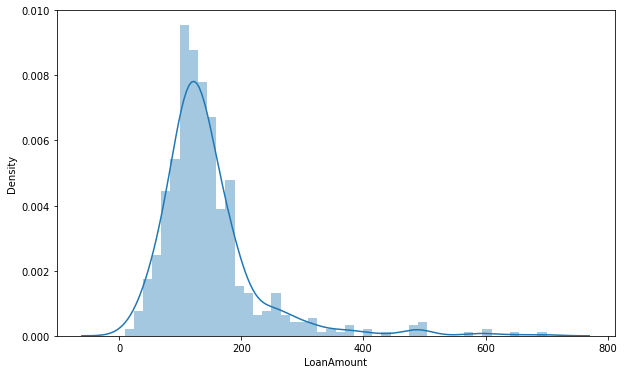

In [ ]:
#LoanAmount
plt.figure(figsize=(10,6))
sns.distplot(df['LoanAmount'])
plt.show()

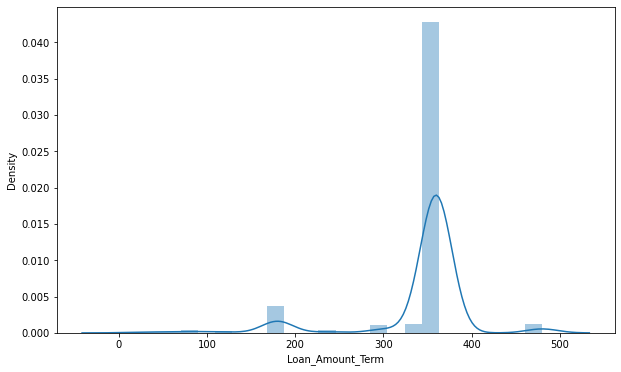

In [ ]:
#LoanAmountTerm
plt.figure(figsize=(10,6))
sns.distplot(df['Loan_Amount_Term'])
plt.show()

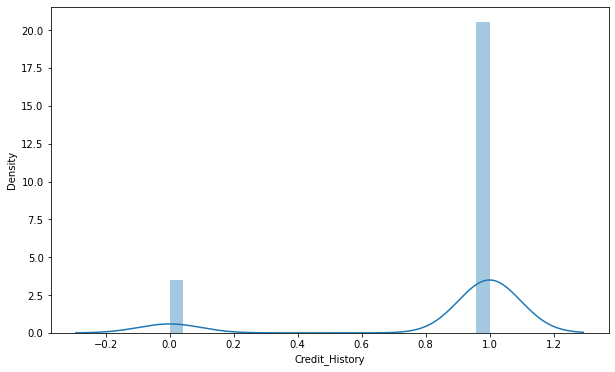

In [ ]:
#CreditHistory
plt.figure(figsize=(10,6))
sns.distplot(df['Credit_History'])
plt.show()

# 2]Violin Plot

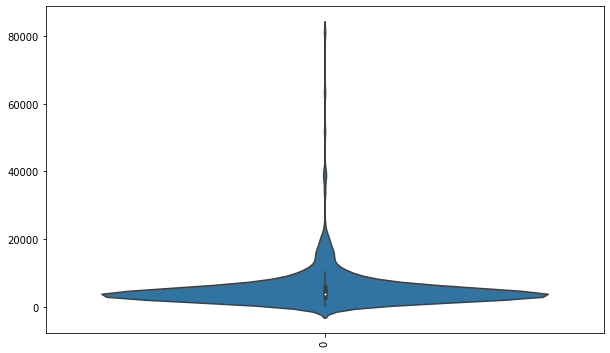

In [ ]:
#ApplicantIncome
plt.figure(figsize=(10,6))
sns.violinplot(df['ApplicantIncome'])
plt.xticks(rotation=90)
plt.show()

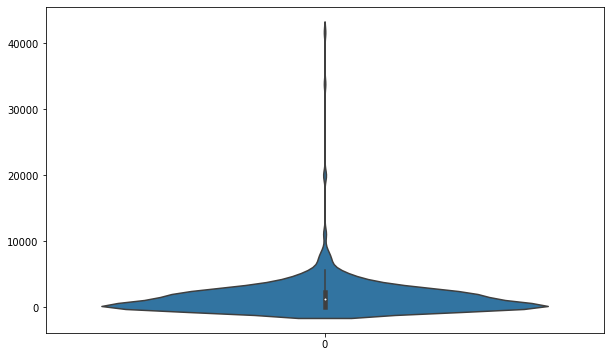

In [ ]:
#CoapplicantIncome
plt.figure(figsize=(10,6))
sns.violinplot(df['CoapplicantIncome'])
plt.show()

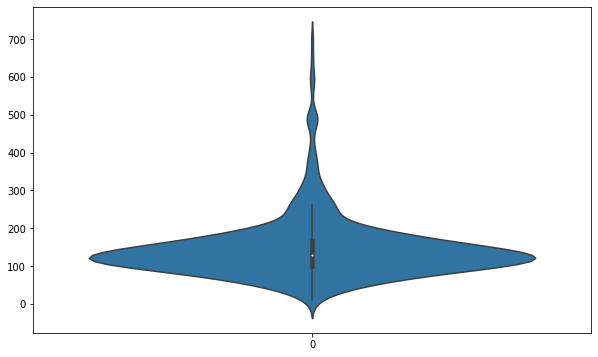

In [ ]:
#LoanAmount
plt.figure(figsize=(10,6))
sns.violinplot(df['LoanAmount'])
plt.show()

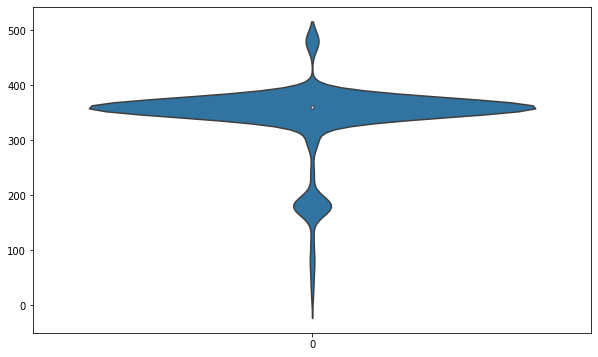

In [ ]:
#LoanAmountTerm
plt.figure(figsize=(10,6))
sns.violinplot(df['Loan_Amount_Term'])
plt.show()

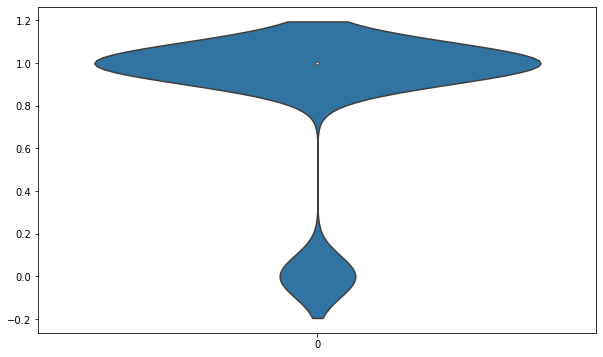

In [ ]:
#CreditHistory
plt.figure(figsize=(10,6))
sns.violinplot(df['Credit_History'])
plt.show()

In [ ]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

# Bivariate Analysis

Using swarm plot I will analyse the distribution between numerical variables vs target variable

In [ ]:
#ApplicantIncome vs Loan_Status
sns.swarmplot(df.Loan_Status,df.ApplicantIncome)
plt.title('ApplicantIncome vs Loan_Status')

TypeError: swarmplot() takes from 0 to 1 positional arguments but 2 were given

Text(0.5, 1.0, 'CoApplicantIncome vs Loan_Status')

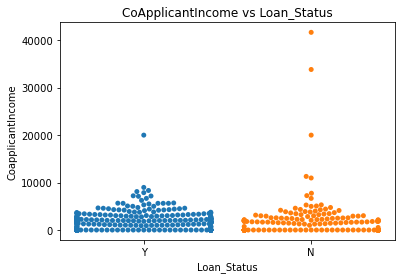

In [ ]:
#CoApplicantIncome vs Loan_Status
sns.swarmplot(df.Loan_Status,df.CoapplicantIncome)
plt.title('CoApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'LoanAmount vs Loan_Status')

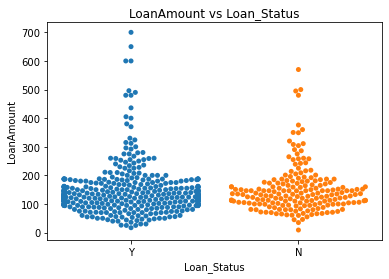

In [ ]:
#LoanAmount vs Loan_Status
sns.swarmplot(df.Loan_Status,df.LoanAmount)
plt.title('LoanAmount vs Loan_Status')

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan_Status')

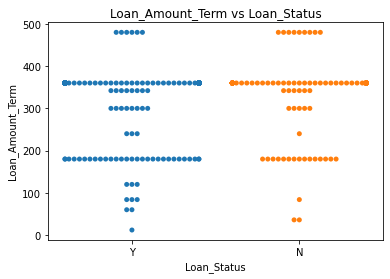

In [ ]:
#Loan_Amount_Term vs Loan_Status
sns.swarmplot(df.Loan_Status,df.Loan_Amount_Term)
plt.title('Loan_Amount_Term vs Loan_Status')

Text(0.5, 1.0, 'Credit_History vs Loan_Status')

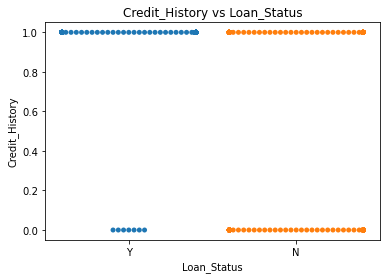

In [ ]:
#Credit_history vs Loan_Status
sns.swarmplot(df.Loan_Status,df.Credit_History)
plt.title('Credit_History vs Loan_Status')

Using strip plot I will analyse the distribution between numerical variables vs target variable

Text(0.5, 1.0, 'ApplicantIncome vs Loan_Status')

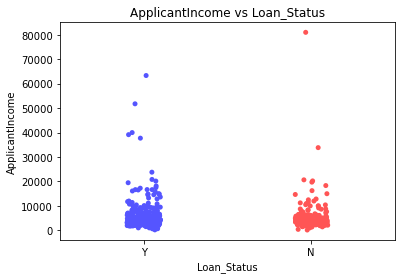

In [ ]:
#ApplicantIncome vs Loan_Status
sns.stripplot(df.Loan_Status,df.ApplicantIncome,palette='seismic')
plt.title('ApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'CoApplicantIncome vs Loan_Status')

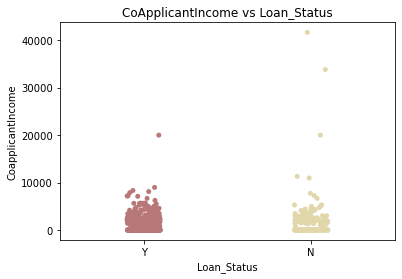

In [ ]:
#CoApplicantIncome vs Loan_Status
sns.stripplot(df.Loan_Status,df.CoapplicantIncome,palette='pink')
plt.title('CoApplicantIncome vs Loan_Status')

Text(0.5, 1.0, 'LoanAmount vs Loan_Status')

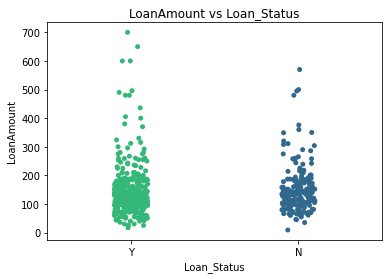

In [ ]:
#LoanAmount vs Loan_Status
sns.stripplot(df.Loan_Status,df.LoanAmount,palette='viridis_r')
plt.title('LoanAmount vs Loan_Status')

Text(0.5, 1.0, 'Loan_Amount_Term vs Loan_Status')

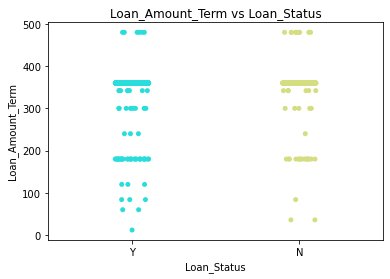

In [ ]:
#Loan_Amount_Term vs Loan_Status
sns.stripplot(df.Loan_Status,df.Loan_Amount_Term,palette='rainbow')
plt.title('Loan_Amount_Term vs Loan_Status')

Text(0.5, 1.0, 'Credit_History vs Loan_Status')

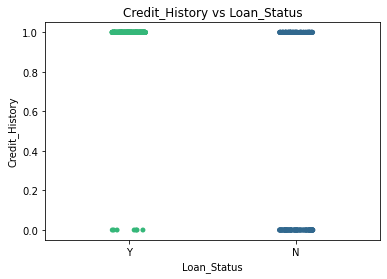

In [ ]:
#Credit_history vs Loan_Status
sns.stripplot(df.Loan_Status,df.Credit_History,palette='viridis_r')
plt.title('Credit_History vs Loan_Status')

Now exploring numerical vs numerical with hue as the target variable i.e Loan_Status

In [ ]:
sns.scatterplot(df.ApplicantIncome,df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('ApplicantIncome vs CoApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('CoApplicantIncome')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

In [ ]:
sns.scatterplot(df.LoanAmount, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('LoanAmount vs CoApplicantIncome')
plt.xlabel('LoanAmount')
plt.ylabel('CoApplicantIncome')

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

Text(0, 0.5, 'CoApplicantIncome')

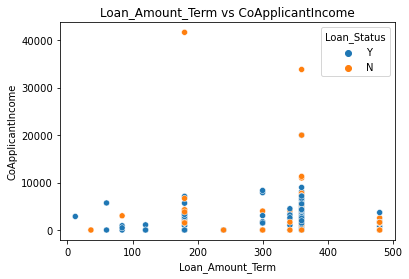

In [ ]:
sns.scatterplot(df.Loan_Amount_Term, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs CoApplicantIncome')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'CoApplicantIncome')

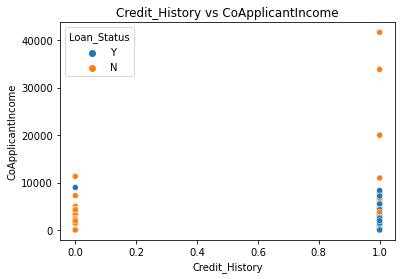

In [ ]:
sns.scatterplot(df.Credit_History, df.CoapplicantIncome,hue=df.Loan_Status)
plt.title('Credit_History vs CoApplicantIncome')
plt.xlabel('Credit_History')
plt.ylabel('CoApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

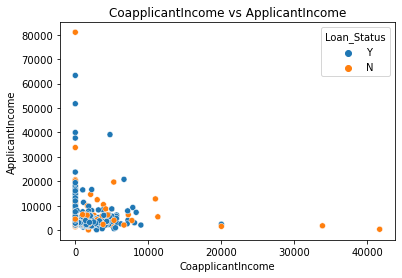

In [ ]:
sns.scatterplot(df.CoapplicantIncome, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs ApplicantIncome')
plt.xlabel('CoapplicantIncome')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

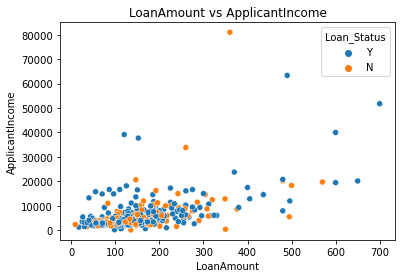

In [ ]:
sns.scatterplot(df.LoanAmount, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('LoanAmount vs ApplicantIncome')
plt.xlabel('LoanAmount')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

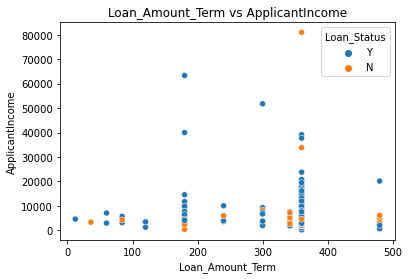

In [ ]:
sns.scatterplot(df.Loan_Amount_Term, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs ApplicantIncome')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'ApplicantIncome')

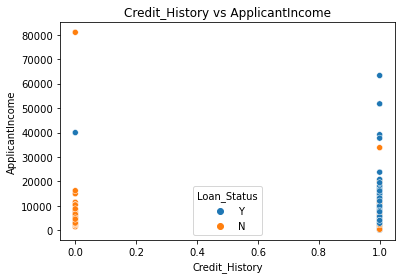

In [ ]:
sns.scatterplot(df.Credit_History, df.ApplicantIncome,hue=df.Loan_Status)
plt.title('Credit_History vs ApplicantIncome')
plt.xlabel('Credit_History')
plt.ylabel('ApplicantIncome')

Text(0, 0.5, 'LoanAmount')

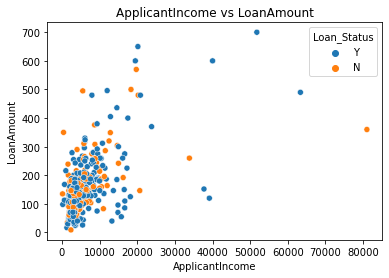

In [ ]:
sns.scatterplot(df.ApplicantIncome, df.LoanAmount,hue=df.Loan_Status)
plt.title('ApplicantIncome vs LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

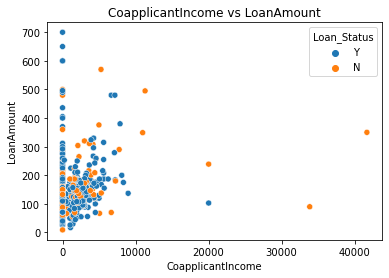

In [ ]:
sns.scatterplot(df.CoapplicantIncome, df.LoanAmount,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs LoanAmount')
plt.xlabel('CoapplicantIncome')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

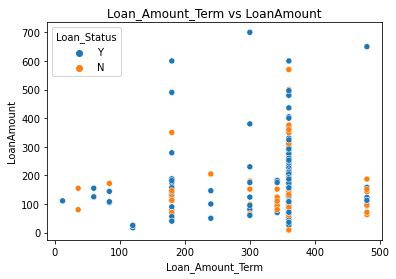

In [ ]:
sns.scatterplot(df.Loan_Amount_Term, df.LoanAmount,hue=df.Loan_Status)
plt.title('Loan_Amount_Term vs LoanAmount')
plt.xlabel('Loan_Amount_Term')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'LoanAmount')

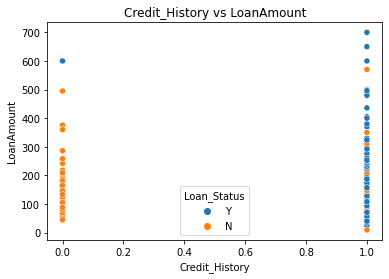

In [ ]:
sns.scatterplot(df.Credit_History, df.LoanAmount,hue=df.Loan_Status)
plt.title('Credit_History vs LoanAmount')
plt.xlabel('Credit_History')
plt.ylabel('LoanAmount')

Text(0, 0.5, 'Loan_Amount_Term')

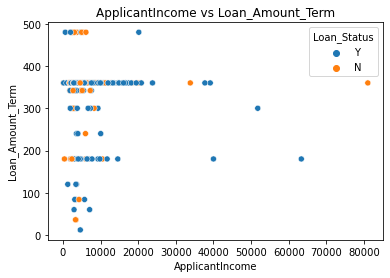

In [ ]:
sns.scatterplot(df.ApplicantIncome, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('ApplicantIncome vs Loan_Amount_Term')
plt.xlabel('ApplicantIncome')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

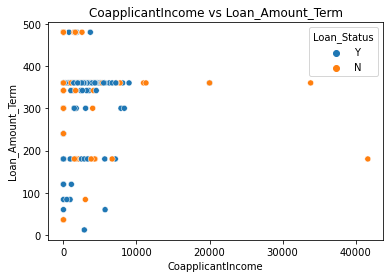

In [ ]:
sns.scatterplot(df.CoapplicantIncome, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('CoapplicantIncome vs Loan_Amount_Term')
plt.xlabel('CoapplicantIncome')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

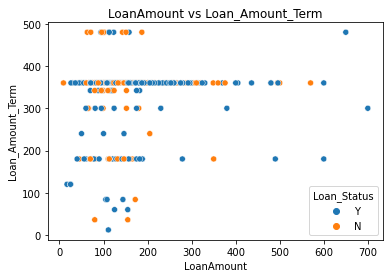

In [ ]:
sns.scatterplot(df.LoanAmount, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('LoanAmount vs Loan_Amount_Term')
plt.xlabel('LoanAmount')
plt.ylabel('Loan_Amount_Term')

Text(0, 0.5, 'Loan_Amount_Term')

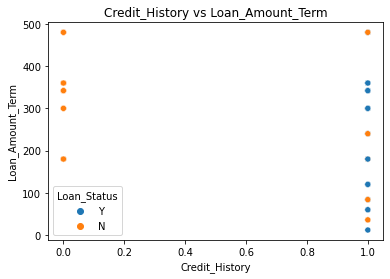

In [ ]:
sns.scatterplot(df.Credit_History, df.Loan_Amount_Term,hue=df.Loan_Status)
plt.title('Credit_History vs Loan_Amount_Term')
plt.xlabel('Credit_History')
plt.ylabel('Loan_Amount_Term')

Categorical vs Numerical

In [ ]:
cat_var = df.select_dtypes(include=['O'])
cat_var.drop(['Loan_Status'],axis=1)

NameError: name 'df' is not defined

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

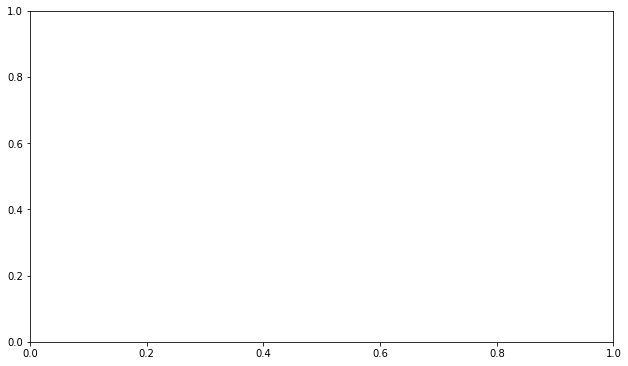

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['ApplicantIncome'],hue=df['Loan_Status'])
    plot += 1
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

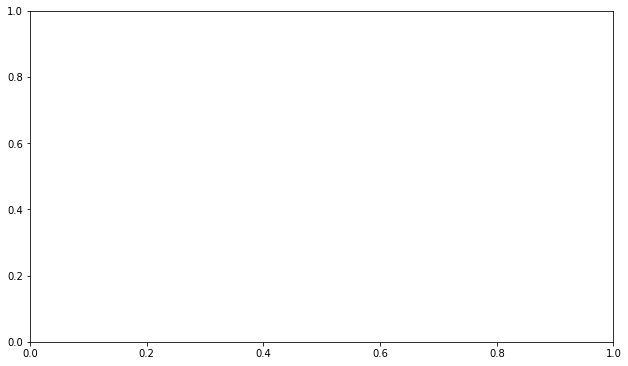

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['CoapplicantIncome'],hue=df['Loan_Status'])
    plot += 1
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

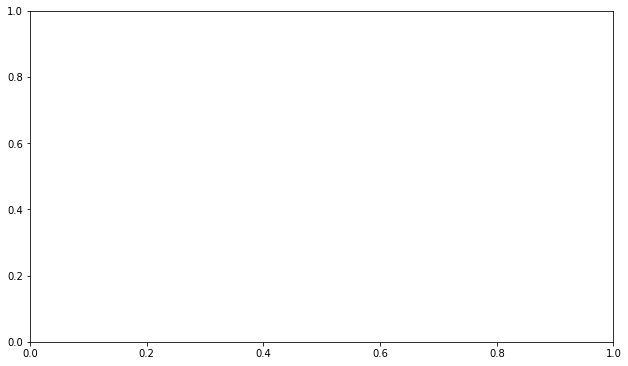

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['LoanAmount'],hue=df['Loan_Status'])
    plot += 1
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

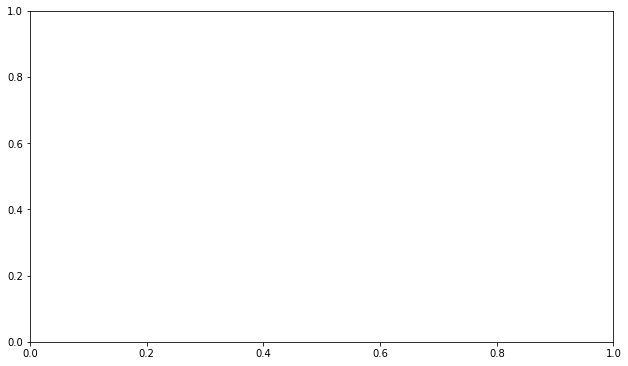

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['Loan_Amount_Term'],hue=df['Loan_Status'])
    plot += 1
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

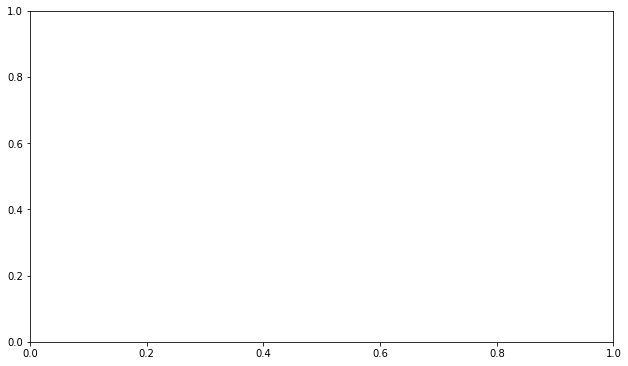

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in cat_var:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.barplot(df[i],df['Credit_History'],hue=df['Loan_Status'])
    plot += 1
plt.show()

Here I have completed the visualization part.

Now I will check if they are any outliers present or not.

In [ ]:
numerical_variables = df.select_dtypes(include=['number'])

numerical_variables

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,146.412162,360.0,1.0
1,4583,1508.0,128.000000,360.0,1.0
2,3000,0.0,66.000000,360.0,1.0
3,2583,2358.0,120.000000,360.0,1.0
4,6000,0.0,141.000000,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0
610,4106,0.0,40.000000,180.0,1.0
611,8072,240.0,253.000000,360.0,1.0
612,7583,0.0,187.000000,360.0,1.0


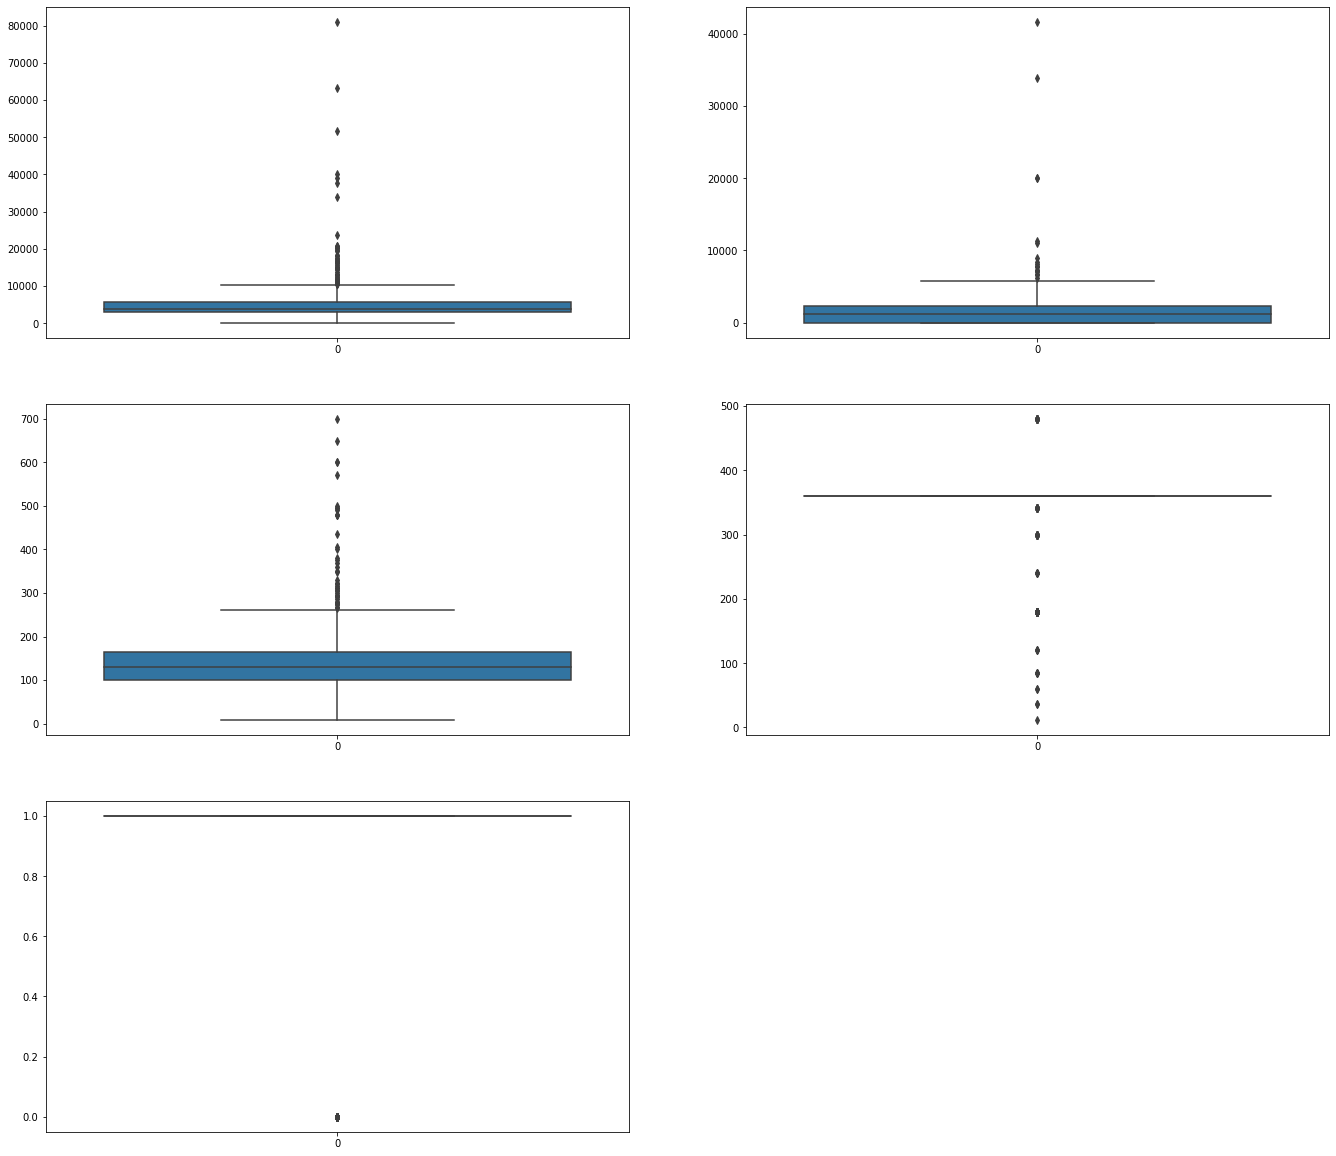

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in numerical_variables:
    if plot < 6:
        ax = plt.subplot(4,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

Applicant Income

In [ ]:
print(df['ApplicantIncome'].quantile(0.10))
print(df['ApplicantIncome'].quantile(0.90))

2216.1
9459.900000000007


In [ ]:
df['ApplicantIncome'] = np.where(df['ApplicantIncome'] > 9459.900000000007,9459.900000000007,df['ApplicantIncome'])


<AxesSubplot: >

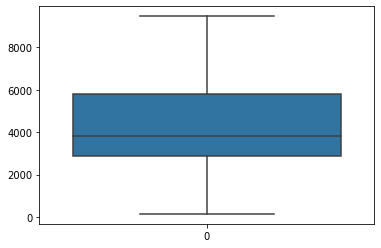

In [ ]:
sns.boxplot(df['ApplicantIncome'])

Co Applicant Income

In [ ]:
print(df['CoapplicantIncome'].quantile(0.10))
print(df['CoapplicantIncome'].quantile(0.90))

0.0
3782.200000000002


In [ ]:
df['CoapplicantIncome'] = np.where(df['CoapplicantIncome'] > 3782.200000000002,3782.200000000002,df['CoapplicantIncome'])

<AxesSubplot: >

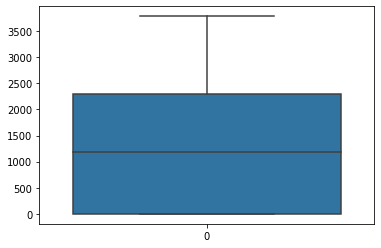

In [ ]:
sns.boxplot(df['CoapplicantIncome'])

Loan Amount

In [ ]:
print(df['LoanAmount'].quantile(0.10))
print(df['LoanAmount'].quantile(0.90))

72.30000000000001
229.4000000000001


In [ ]:
df['LoanAmount'] = np.where(df['LoanAmount'] > 229.4000000000001,229.4000000000001,df['LoanAmount'])

<AxesSubplot: >

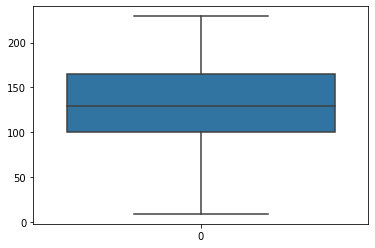

In [ ]:
sns.boxplot(df['LoanAmount'])

Loan Amount Term

In [ ]:
print(df['Loan_Amount_Term'].quantile(0.10))
print(df['Loan_Amount_Term'].quantile(0.90))

300.0
360.0


In [ ]:
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] > 360.0,360.0,df['Loan_Amount_Term'])
df['Loan_Amount_Term'] = np.where(df['Loan_Amount_Term'] < 300.0,300.0,df['Loan_Amount_Term'])

<AxesSubplot: >

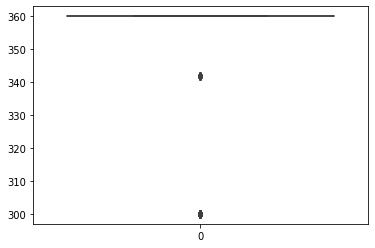

In [ ]:
sns.boxplot(df['Loan_Amount_Term'])

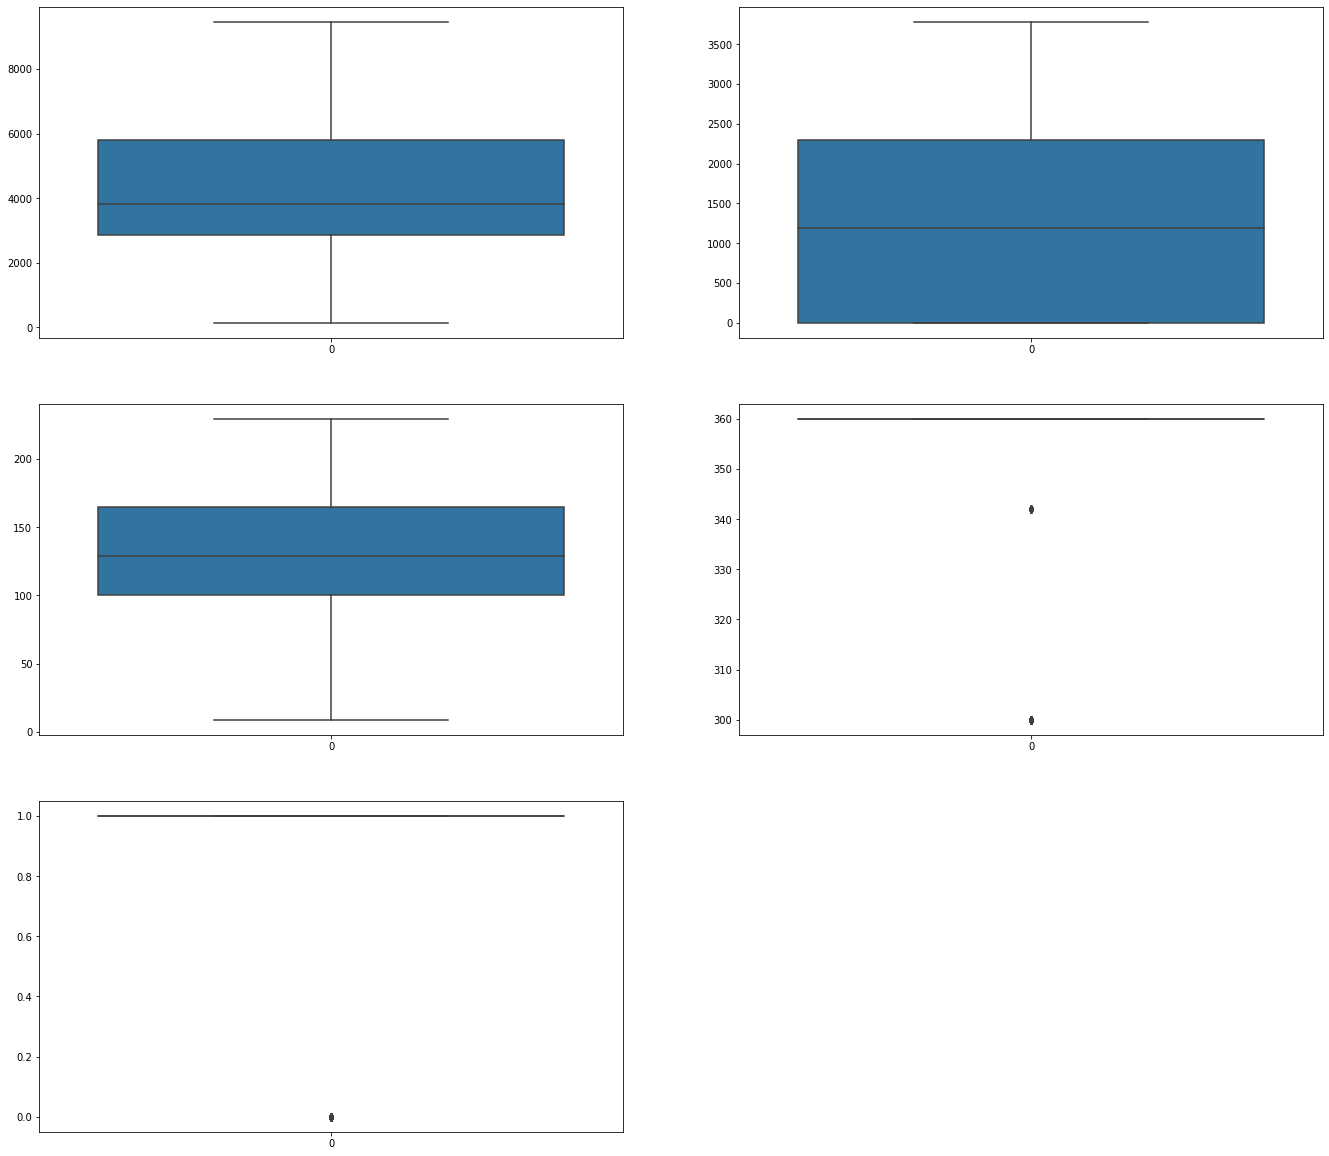

In [ ]:
plt.figure(figsize=(23,28))
plot = 1
for i in numerical_variables:
    if plot < 6:
        ax = plt.subplot(4,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

Check for skewness

In [ ]:
df.skew()

ApplicantIncome      0.910711
CoapplicantIncome    0.518499
LoanAmount           0.291910
Loan_Amount_Term    -2.289653
Credit_History      -2.021971
dtype: float64

# Encoding Technique

In [59]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [60]:
for feature in df.select_dtypes(include=['O']):
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [61]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


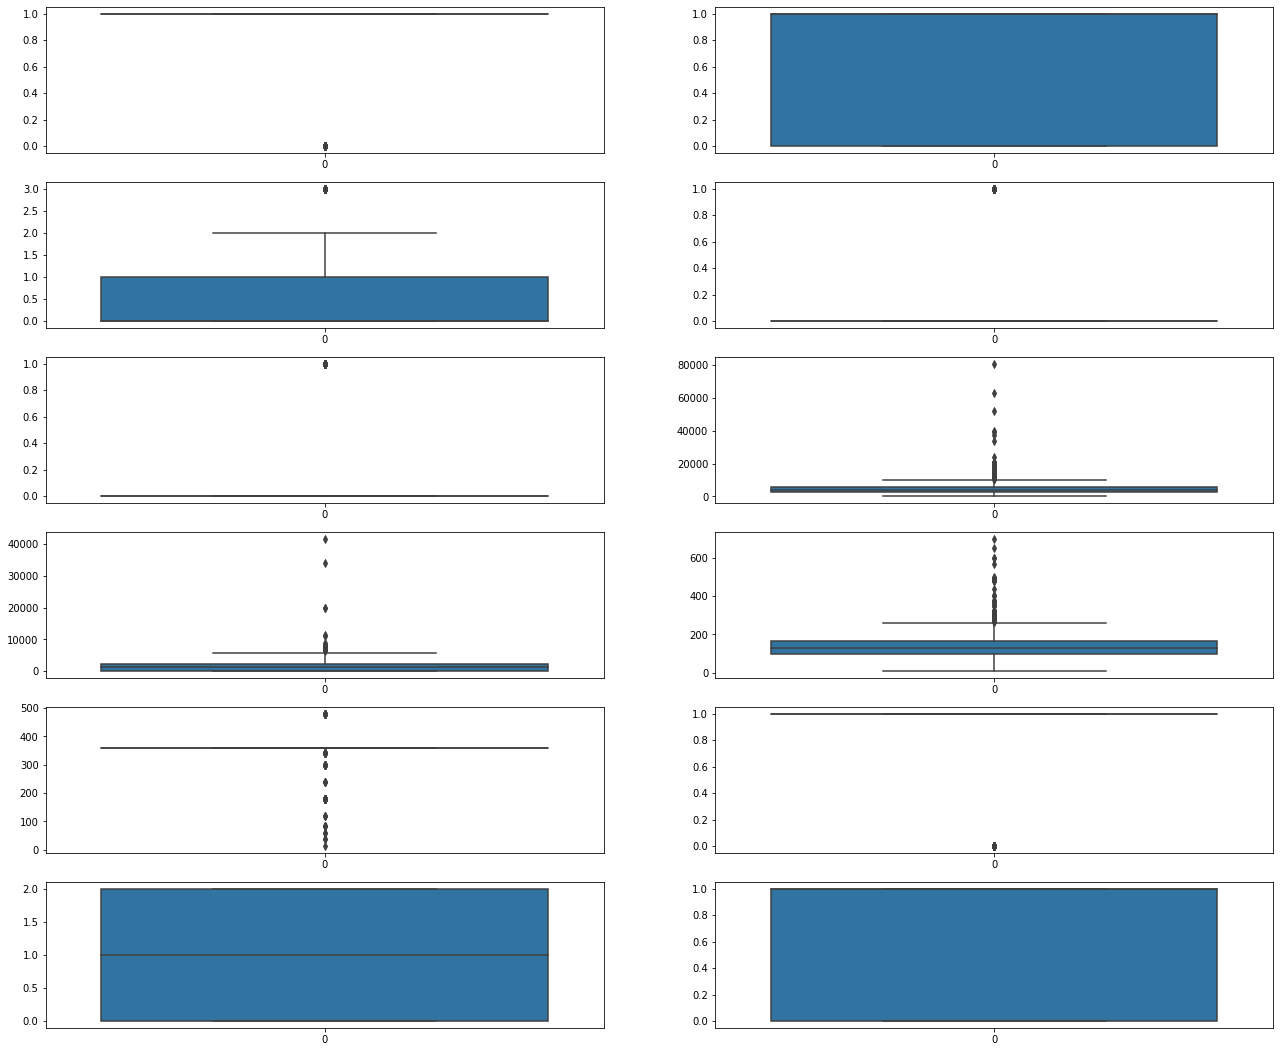

In [62]:
plt.figure(figsize=(22,22))
plot = 1
for i in df:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.boxplot(df[i])
    plot += 1
plt.show()

# Correlation Matrix

In [63]:
df_corr = df.corr()

df_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

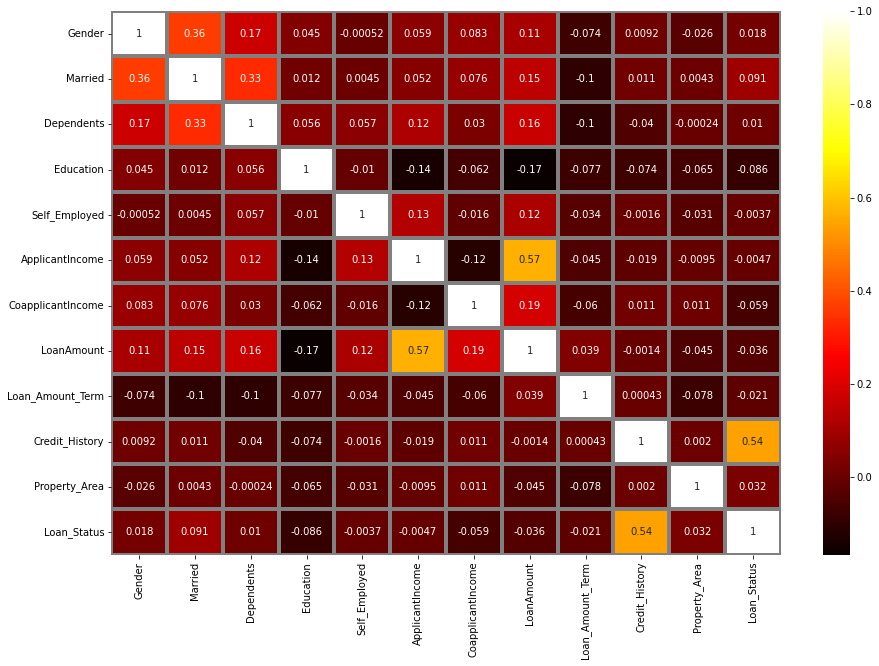

In [64]:
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,linecolor='grey',linewidths=4,cmap='hot')
plt.tight_layout

In [65]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

I will tune the skewness part in the latter stages 

From the above skewness part I will drop Loan_ID because it is not contibuting to our model.

In [66]:
#Dropping unvalid column
df = df.drop(['Loan_ID'],axis=1)

df.head()

KeyError: "['Loan_ID'] not found in axis"

# Target Variable

Here the target variable is Loan Status.I will check the distribution of the target variable.

In [73]:
print(df['Loan_Status'].value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64


# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [69]:
X = df.drop(['Loan_Status'],axis=1)
Y = df['Loan_Status']

In [70]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [71]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

Now I will use Power Transformer to reduce the skewness part.

# Power Transfomer

In [74]:
from sklearn.preprocessing import PowerTransformer

In [75]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.411733,1.193567


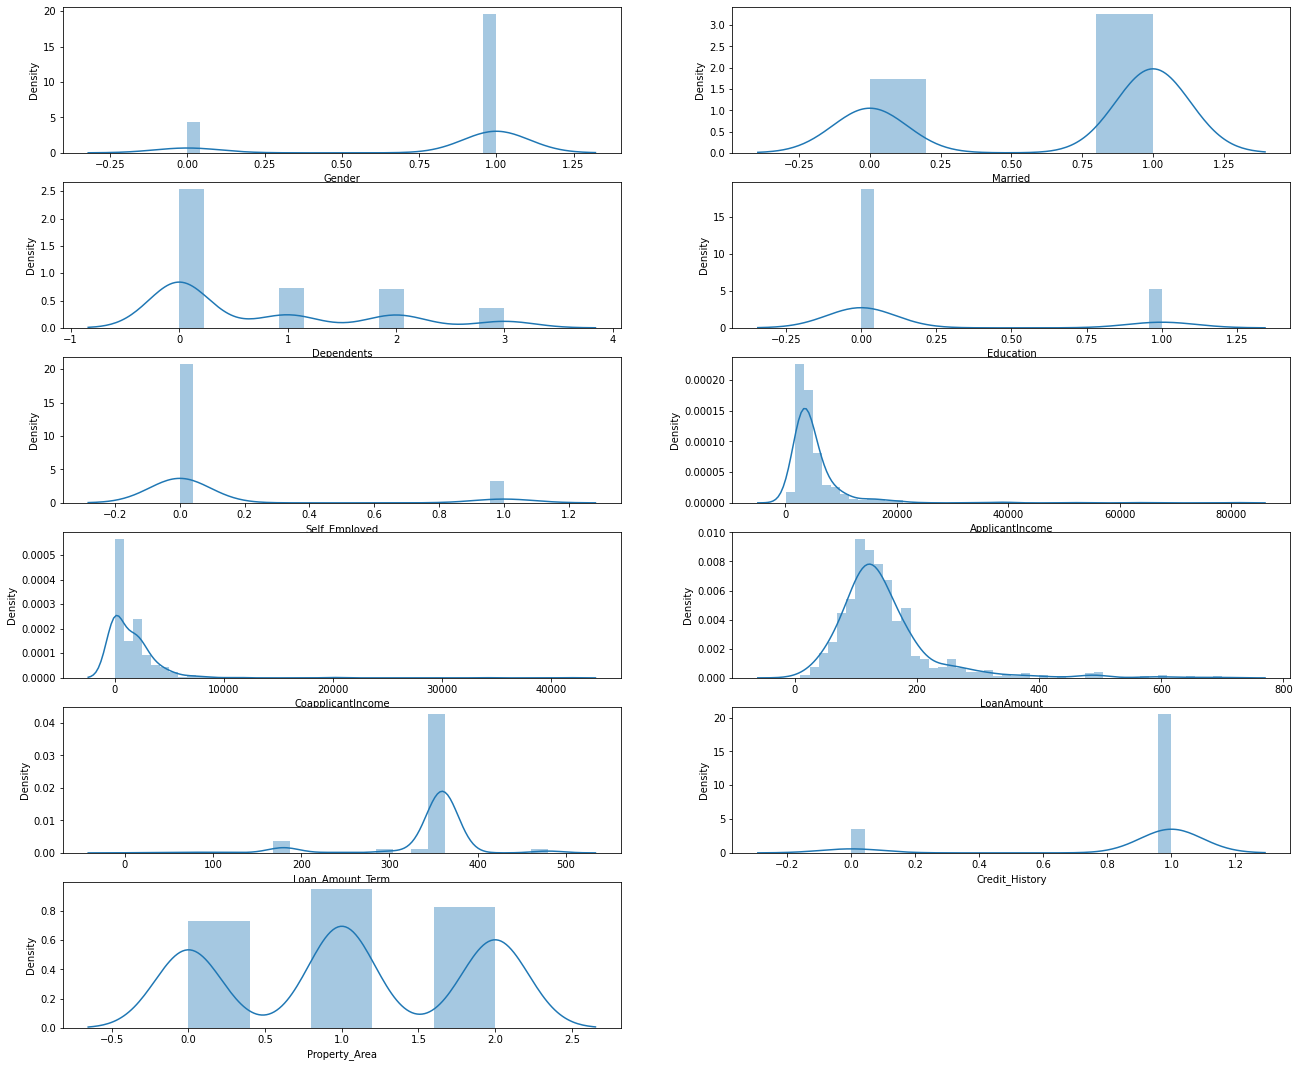

In [76]:
plt.figure(figsize=(22,22))
plot = 1
for i in X:
    if plot < 14:
        ax = plt.subplot(7,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()

# VIF

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,vif,features
0,1.204972,Gender
1,1.415900,Married
2,1.192006,Dependents
3,1.065423,Education
4,1.043801,Self_Employed
5,1.847728,ApplicantIncome
6,1.545295,CoapplicantIncome
7,1.594483,LoanAmount
8,1.047222,Loan_Amount_Term
9,1.008115,Credit_History


All the values are below 10,So there is no multicollinearity

Now I will normalize the values using Standard Scaler

# Feature Scaling

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

X_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.411733,1.193567


In [79]:
import pickle

In [80]:
pickle.dump(scaler,open('scaling.pkl','wb'))

# Converting an Imbalanced Dataset to Balanced Dataset

In [81]:
Y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [82]:
from imblearn.over_sampling import SMOTE

In [84]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X_scaled, Y = oversample.fit_resample(X_scaled, Y)

In [85]:
Y.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

Now I will proceed to Model Building part

# Model Building

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit,StratifiedKFold

Data

In [89]:
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
839,0.472343,-1.372089,0.240762,-0.528362,-0.392601,0.246714,-1.102837,-0.389185,0.185905,-2.428760,-1.350003
840,0.472343,0.372336,-0.827104,-0.528362,-0.392601,-5.317665,0.862966,-0.165215,0.185905,0.411733,-1.350003
841,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,-0.556444,-1.102837,-0.878053,0.185905,0.411733,1.193567
842,0.472343,0.728816,1.316702,-0.528362,-0.392601,-0.464037,0.805926,0.138258,0.185905,-2.428760,-0.588170


In [90]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

# 1]Logistic Regression

Finding the best random state for our model

In [91]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test, y_lr)
    
    if accuracy_lr>maxAccuracy:
        maxAccuracy=accuracy_lr
        maxRandomState=i

print("Best accuracy score is", accuracy_lr ," on Random State", maxRandomState)

Best accuracy score is 0.6729857819905213  on Random State 94


In [92]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=94)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("-----------------------------------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

print("-----------------------------------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("-----------------------------------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  78.67298578199052
-----------------------------------------------------------------------
[0.69822485 0.71597633 0.70414201 0.73372781 0.73809524]
Cross Validation Score :  0.7180332488024795
-----------------------------------------------------------------------
[[ 65  31]
 [ 14 101]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.68      0.74        96
           1       0.77      0.88      0.82       115

    accuracy                           0.79       211
   macro avg       0.79      0.78      0.78       211
weighted avg       0.79      0.79      0.78       211



In [93]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.75739645 0.72781065 0.78106509 0.66272189 0.52380952]
--------------------------------------------------
K-Fold Cross Validation Score :  69.05607213299521


In [94]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
l3 = cross_val_score(lr,X_scaled,Y,cv=Stra_K_fold)
print(l3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",l3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.69822485 0.71597633 0.70414201 0.73372781 0.73809524]
--------------------------------------------------------
Stratified K Fold :  71.80332488024796


In [95]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(l2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",l2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.70616114 0.72511848 0.71563981 0.71090047 0.72511848]
--------------------------------------------------
 Stratified Shuffle Split :  71.65876777251185


# 2]KNN

Finding the best random state for the model

In [97]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7819905213270142  on Random State 11


In [99]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=11)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))



Accuracy score :  78.19905213270142
---------------------------------------------
[0.72781065 0.72781065 0.72189349 0.73372781 0.75      ]
Cross Validation Score :  0.7322485207100591
---------------------------------------------
[[83 21]
 [25 82]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       104
           1       0.80      0.77      0.78       107

    accuracy                           0.78       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.78      0.78       211



In [100]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.76331361 0.60946746 0.69822485 0.69230769 0.70238095]
--------------------------------------------------
K-Fold Cross Validation Score :  69.31389123696816


In [101]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
k3 = cross_val_score(knn,X_scaled,Y,cv=Stra_K_fold)
print(k3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",k3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.72781065 0.72781065 0.72189349 0.73372781 0.75      ]
--------------------------------------------------------
Stratified K Fold :  73.22485207100591


In [102]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.74881517 0.70616114 0.74407583 0.72985782 0.72985782]
--------------------------------------------------
 Stratified Shuffle Split :  73.17535545023695


# 3]Decision Tree

Finding the best random state for our model

In [103]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8199052132701422  on Random State 62


In [104]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=62)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))


Accuracy score :  82.93838862559242
---------------------------------------------
[0.72781065 0.69822485 0.79881657 0.79289941 0.86309524]
Cross Validation Score :  0.7761693434770358
---------------------------------------------
[[84 15]
 [21 91]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.85      0.82        99
           1       0.86      0.81      0.83       112

    accuracy                           0.83       211
   macro avg       0.83      0.83      0.83       211
weighted avg       0.83      0.83      0.83       211



In [105]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.71005917 0.62721893 0.73372781 0.76331361 0.92261905]
--------------------------------------------------
K-Fold Cross Validation Score :  75.13877148492533


In [106]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
d3 = cross_val_score(dt,X_scaled,Y,cv=Stra_K_fold)
print(d3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",d3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.71005917 0.71005917 0.79289941 0.79881657 0.85714286]
--------------------------------------------------------
Stratified K Fold :  77.3795435333897


In [107]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
d2 = cross_val_score(dt,X_scaled,Y,cv=Stratified_Shuffle)
print(d2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",d2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.72834646 0.72834646 0.76377953 0.7992126  0.76377953]
--------------------------------------------------
 Stratified Shuffle Split :  75.66929133858268


# 4]Support Vector Machine

Finding the best random state for our model

In [108]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    svc=SVC()
    svc.fit(x_train, y_train)
    y_svc = svc.predict(x_test)
    accuracy_svc = accuracy_score(y_test, y_svc)
    
    if accuracy_svc>maxAccuracy:
        maxAccuracy=accuracy_svc
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.7914691943127962  on Random State 62


In [110]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=62)

#training our model
svc=SVC()
svc.fit(x_train, y_train)

#Predicting y_test
y_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_svc)

#Accuracy Score
print("Accuracy score : ", accuracy_svc*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_svc = cross_val_score(svc,X_scaled,Y,cv=5)
print(cross_val_svc)
print("Cross Validation Score : ",cross_val_svc.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_svc))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_svc))



Accuracy score :  79.14691943127961
---------------------------------------------
[0.71597633 0.76331361 0.69822485 0.75147929 0.78571429]
Cross Validation Score :  0.7429416737109045
---------------------------------------------
[[ 67  32]
 [ 12 100]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.68      0.75        99
           1       0.76      0.89      0.82       112

    accuracy                           0.79       211
   macro avg       0.80      0.78      0.79       211
weighted avg       0.80      0.79      0.79       211



In [111]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
s1 = cross_val_score(svc,X_scaled,Y,cv=K_fold)
print(s1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , s1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.77514793 0.72781065 0.74556213 0.65680473 0.55357143]
--------------------------------------------------
K-Fold Cross Validation Score :  69.17793744716822


In [112]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
s3 = cross_val_score(svc,X_scaled,Y,cv=Stra_K_fold)
print(s3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",s3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.71597633 0.76331361 0.69822485 0.75147929 0.78571429]
--------------------------------------------------------
Stratified K Fold :  74.29416737109045


In [113]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
s2 = cross_val_score(svc,X_scaled,Y,cv=Stratified_Shuffle)
print(s2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",s2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.76777251 0.74881517 0.73459716 0.72511848 0.75829384]
--------------------------------------------------
 Stratified Shuffle Split :  74.69194312796208


# 5]Random Forest

In [114]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8909952606635071  on Random State 45


In [115]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=45)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))



Accuracy score :  87.20379146919431
---------------------------------------------
[0.78698225 0.75147929 0.86390533 0.85207101 0.91071429]
Cross Validation Score :  0.8330304311073542
---------------------------------------------
[[ 79  17]
 [ 10 105]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        96
           1       0.86      0.91      0.89       115

    accuracy                           0.87       211
   macro avg       0.87      0.87      0.87       211
weighted avg       0.87      0.87      0.87       211



In [119]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.82248521 0.75147929 0.81065089 0.83431953 0.86309524]
--------------------------------------------------
K-Fold Cross Validation Score :  81.64060298675683


In [120]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
r3 = cross_val_score(rf,X_scaled,Y,cv=Stra_K_fold)
print(r3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",r3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.75147929 0.75739645 0.87573964 0.87573964 0.9047619 ]
--------------------------------------------------------
Stratified K Fold :  83.30233868695407


In [121]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",r2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.81990521 0.81516588 0.81042654 0.84834123 0.82938389]
--------------------------------------------------
 Stratified Shuffle Split :  82.46445497630333


# 6]Gradient Boost

Finding the best random state for our model

In [122]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy_gb = accuracy_score(y_test, y_gb)
    
    if accuracy_gb>maxAccuracy:
        maxAccuracy=accuracy_gb
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8388625592417062  on Random State 32


In [123]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=32)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))



Accuracy score :  83.88625592417061
---------------------------------------------
[0.68639053 0.69822485 0.82840237 0.79881657 0.89880952]
Cross Validation Score :  0.7821287686672302
---------------------------------------------
[[ 75  30]
 [  4 102]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.71      0.82       105
           1       0.77      0.96      0.86       106

    accuracy                           0.84       211
   macro avg       0.86      0.84      0.84       211
weighted avg       0.86      0.84      0.84       211



In [124]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.73372781 0.72781065 0.73964497 0.75147929 0.76785714]
--------------------------------------------------
K-Fold Cross Validation Score :  74.41039729501269


In [125]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
g3 = cross_val_score(gb,X_scaled,Y,cv=Stra_K_fold)
print(g3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",g3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.68639053 0.69822485 0.82248521 0.79881657 0.89285714]
--------------------------------------------------------
Stratified K Fold :  77.97548605240912


In [126]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.78740157 0.79527559 0.77952756 0.7992126  0.81102362]
--------------------------------------------------
 Stratified Shuffle Split :  79.44881889763779


# 7]Xgboost

In [127]:
import xgboost as xgb

Finding the random state for our model

In [128]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=i)
    xgbt=xgb.XGBClassifier()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    accuracy_xgbt = accuracy_score(y_test, y_xgbt)
    
    if accuracy_xgbt>maxAccuracy:
        maxAccuracy=accuracy_xgbt
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8483412322274881  on Random State 12


In [130]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=12)

#training our model
xgbt=xgb.XGBClassifier()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
accuracy_xgbt = accuracy_score(y_test, y_xgbt)

#Accuracy Score
print("Accuracy score : ", accuracy_xgbt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_xgbt= cross_val_score(xgbt,X_scaled,Y,cv=5)
print(cross_val_xgbt)
print("Cross Validation Score : ",cross_val_xgbt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_xgbt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_xgbt))



Accuracy score :  84.83412322274881
---------------------------------------------
[0.72189349 0.73372781 0.86982249 0.81065089 0.86904762]
Cross Validation Score :  0.8010284587207664
---------------------------------------------
[[91 17]
 [15 88]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       108
           1       0.84      0.85      0.85       103

    accuracy                           0.85       211
   macro avg       0.85      0.85      0.85       211
weighted avg       0.85      0.85      0.85       211



In [131]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
xg1 = cross_val_score(xgbt,X_scaled,Y,cv=K_fold)
print(xg1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , xg1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.79289941 0.75147929 0.73372781 0.82248521 0.83333333]
--------------------------------------------------
K-Fold Cross Validation Score :  78.6785009861933


In [132]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
xg3 = cross_val_score(xgbt,X_scaled,Y,cv=Stra_K_fold)
print(xg3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",xg3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.72189349 0.73372781 0.86982249 0.81065089 0.86904762]
--------------------------------------------------------
Stratified K Fold :  80.10284587207664


In [133]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.25)
print(Stratified_Shuffle)
xg2 = cross_val_score(xgbt,X_scaled,Y,cv=Stratified_Shuffle)
print(xg2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",xg2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.25,
            train_size=None)
[0.79146919 0.78199052 0.81990521 0.77725118 0.76777251]
--------------------------------------------------
 Stratified Shuffle Split :  78.76777251184835


# Hyperparameter Tuning 

In [134]:
from sklearn.model_selection import GridSearchCV

In [135]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

In [136]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [137]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [138]:
gs_rf.best_params_

{'criterion': 'log_loss',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

In [139]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=8)

In [140]:
gs_rf.best_score_

0.7883264591926009

In [141]:
gs_rf.cv_results_['params']

[{'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 120},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 150},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 1,
  'n_estimators': 170},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 100},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 120},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 150},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt',
  'min_samples_split': 2,
  'n_estimators': 170},
 {'criterion': 'gini',
  'max_depth': 2,
  'max_features': 'sqrt

In [142]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25)

In [143]:
final_model = RandomForestClassifier(max_depth=8, min_samples_split=3,max_features='auto', n_estimators=120,criterion='log_loss')
print(final_model)
print("------------------------------------------------------------------------")
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print(final_model_pred)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred))
print("-------------------------------------------------------------------------")


RandomForestClassifier(criterion='log_loss', max_depth=8, max_features='auto',
                       min_samples_split=3, n_estimators=120)
------------------------------------------------------------------------
[1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1]
Accuracy Score : 0.8056872037914692
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.90      0.68      0.78       104
           1       0.75      0.93      0.83       107

    accuracy                           0.81       211
   ma

As per the cross validation process , I will figure out the mean and get the results.

In [144]:
gs_rf.cv_results_['mean_test_score']

array([0.71878515, 0.72035996, 0.72353456, 0.72194726, 0.72508436,
       0.71878515, 0.72193476, 0.72194726, 0.72035996, 0.72512186,
       0.72193476, 0.72669666, 0.72827147, 0.72825897, 0.72035996,
       0.72668416, 0.72512186, 0.71719785, 0.73142107, 0.72352206,
       0.72194726, 0.72353456, 0.72512186, 0.72512186, 0.744032  ,
       0.7456068 , 0.74244469, 0.73930759, 0.74089489, 0.73458318,
       0.7503812 , 0.74089489, 0.73455818, 0.7456193 , 0.74244469,
       0.74089489, 0.74246969, 0.73775778, 0.75035621, 0.7456193 ,
       0.74565679, 0.744032  , 0.74246969, 0.74091989, 0.7472191 ,
       0.73457068, 0.74406949, 0.74249469, 0.751981  , 0.75833021,
       0.75986752, 0.7488064 , 0.76140482, 0.76141732, 0.75825522,
       0.75511811, 0.75355581, 0.76142982, 0.75830521, 0.75828021,
       0.76460442, 0.75195601, 0.7503687 , 0.75510561, 0.76462942,
       0.75195601, 0.75671791, 0.76145482, 0.75668041, 0.75983002,
       0.75511811, 0.75355581, 0.77566554, 0.76772903, 0.76774

Best accuracy from training

In [145]:
print(gs_rf.score(x_test,y_test))

0.9052132701421801


# HyperParameter Tuning - II

Using Randomized Search CV

In [146]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
from scipy.stats import randint as sp_randint

In [148]:
params_1 = {
    "max_depth": [3, None],
    "max_features": sp_randint(1, 11),
    "min_samples_split": sp_randint(2, 11),
    "min_samples_leaf": sp_randint(1, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [149]:
rs_rf = RandomizedSearchCV(rf,param_distributions=params_1,cv=5)

rs_rf

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB465C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB45CF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB46710>})

In [150]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.25)

In [151]:
rs_rf.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB465C0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB45CF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001493AB46710>})

In [152]:
print(rs_rf.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7, 'min_samples_split': 6}


In [153]:
rs_rf.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=4, min_samples_leaf=7,
                       min_samples_split=6)

In [154]:
rs_rf.best_score_

0.7788026496687914

As per the Cross-Validation process, will figure out the mean and get the results

In [155]:
rs_rf.cv_results_['mean_test_score']

array([0.76769154, 0.76616673, 0.75190601, 0.76612923, 0.76927884,
       0.76136733, 0.76294213, 0.75506812, 0.77880265, 0.76774153])

Best accuracy for training

In [156]:
rs_rf.score(x_test,y_test)

0.7677725118483413

In [157]:
final_model_ = RandomForestClassifier(bootstrap=True,criterion='gini',max_depth=None,max_features=7,min_samples_leaf=2,
                                     min_samples_split=2)
print(final_model_)
print("------------------------------------------------------------------------")
final_model_.fit(x_train,y_train)
final_model_pred_ = final_model_.predict(x_test)
print(final_model_pred_)
print("Accuracy Score :",accuracy_score(y_test,final_model_pred_))
print("------------------------------------------------------------------------")
print("Classification Report : ",classification_report(y_test,final_model_pred_))
print("-------------------------------------------------------------------------")

RandomForestClassifier(max_features=7, min_samples_leaf=2)
------------------------------------------------------------------------
[0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1]
Accuracy Score : 0.7962085308056872
------------------------------------------------------------------------
Classification Report :                precision    recall  f1-score   support

           0       0.91      0.66      0.76       105
           1       0.73      0.93      0.82       106

    accuracy                           0.80       211
   macro avg       0.82      0.80      0.79       211
weighted avg       0.82      0.80

I did Hyperparameter Tuning with Grid Search Cv and Randomized Seach Cv for random forest model.The conculsion which I got is it has better accuracy for Grid Seach compared to Randomized Search Cv.Therefore,Grid Search Cv performed better for the model.

# Saving the best model

In [158]:
import pickle

In [159]:
filename = 'Loan_Application_Status.pkl'

In [160]:
pickle.dump(gs_rf,open(filename,'wb'))

In [161]:
pickled_model = pickle.load(open('Loan_Application_Status.pkl','rb'))
pickled_model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [162]:
X_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,0.235387,0.185905,0.411733,1.193567
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.037659,0.185905,0.411733,-1.350003
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.346305,0.185905,0.411733,1.193567
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.167886,0.185905,0.411733,1.193567
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.158610,0.185905,0.411733,1.193567
...,...,...,...,...,...,...,...,...,...,...,...
839,0.472343,-1.372089,0.240762,-0.528362,-0.392601,0.246714,-1.102837,-0.389185,0.185905,-2.428760,-1.350003
840,0.472343,0.372336,-0.827104,-0.528362,-0.392601,-5.317665,0.862966,-0.165215,0.185905,0.411733,-1.350003
841,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,-0.556444,-1.102837,-0.878053,0.185905,0.411733,1.193567
842,0.472343,0.728816,1.316702,-0.528362,-0.392601,-0.464037,0.805926,0.138258,0.185905,-2.428760,-0.588170


In [164]:
#predict for new data

df_unseen_data = pd.read_csv('C:/Users/User/Desktop/Data Science/Data_Trained_Evaluation_Projects/test_Y3wMUE5_7gLdaTN.csv')
df_unseen_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [165]:
#Fetched only one record from the test data
p = df_unseen_data.head(1)
p

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [166]:
#Dropped the unnecessary column called Loan_ID that doesn't add value to the model
p.drop(['Loan_ID'],axis=1,inplace=True)

In [167]:
p

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban


In [168]:
#Converting categorical to numerical 
for t in p.select_dtypes(include=['O']):
    p[t] = le.fit_transform(p[t])
    p[t]

In [172]:
p

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,0,0,5720,0,110.0,360.0,1.0,0


In [169]:
p.shape

(1, 11)

In [170]:
#Predicted the model using unseen data which gave me the result
pickled_model.predict(scaler.transform(p))

array([0])